# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

### Step - 1 (Setup Code)

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Step - 2 (Download the dataset)

In [2]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'

# !wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz 
# !tar -xzvf cifar-10-python.tar.gz
# !del cifar-10-python.tar.gz   

In [3]:
!curl http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:07 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:08 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:09 --:--:--     0
  0     0    0     0    0     0      0      0 --:--

In [4]:
!tar -xzvf cifar-10-python.tar.gz

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [5]:
!del cifar-10-python.tar.gz

In [3]:
import warnings

In [4]:
warnings.filterwarnings("ignore")

### Step - 3 (Load the Dataset)

In [5]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

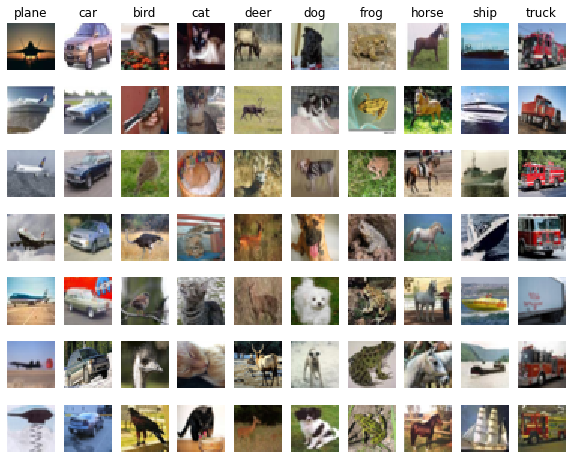

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [7]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


### Step - 6 (Apply all possible classification algorithms)

For each algo complete the following steps with appropriate plots, diagrams and code - 
1. Discuss the intuition behind each algorithm
2. Mention pros and cons
3. Discuss about Model parameters and Hyperparameters
4. Discuss about overfitting and underfitting with relavant plots and code (Hint: Use cross validation and plot hyperparameter vs accuracy score)
5. Discuss about train and test time/space complexities
6. Measure the performance of model using various metrics and write in detail about each metric

### Step - 7 (Compare all the models)

Conclude by following below mentioed steps -
1. Plot a table showing all the algorithms used and corresponding performance metrics
2. Is there any one algorithm that can be used on all the datasets? (Hint: Read about 'No Free Lunch' theorem)

- Precision Score = TP / (TP + FP)
- Recall Score = TP / (TP + FN)
- F1 = 2 * (precision * recall) / (precision + recall)
- Accuracy Score = (TP + TN) / (TP+FP+FN+TN)

In [9]:
!pip3 install xgboost

# KNN

- Select the number K of the neighbors
- Calculate the Euclidean distance of K number of neighbors
- Take the K nearest neighbors as per the calculated Euclidean distance.
- Among these k neighbors, count the number of the data points in each category.
- Assign the new data points to that category for which the number of the neighbor is maximum.
- Our model is ready.

Euclidian distance = $ \sqrt[2]{(X_2-X_1)^2+(Y_2-Y_1)^2} $

### Advantages
- It is simple to implement.
- It can be more effective if the training data is large

### Disadvantages
- Always needs to determine the value of K which may be complex some time.
- The computation cost is high because of calculating the distance between the data points for all the training samples.

In [8]:
from sklearn.neighbors import KNeighborsClassifier 

import time # Importing time to know the time taken for the data to be fit in the model
start_time_knn = time.time()

knn = KNeighborsClassifier(n_neighbors=10) # n_neighbors is the Number of neighbors to use
knn.fit(X_train,y_train) # Fitting X_train and y_train in the model to learn
y_pred_knn = knn.predict(X_test) # Predicting the values by the model for X_test data

end_time_knn = time.time()
duration_knn = end_time_knn - start_time_knn
print('Time for KNN :-',duration_knn)

print("\n")

from sklearn import metrics


print("Accuracy Score for KNN :-",metrics.accuracy_score(y_test, y_pred_knn))
print("\n")

from sklearn.metrics import classification_report, confusion_matrix
cm_knn = confusion_matrix(y_test,y_pred_knn)
print("\nConfusion Matrix for KNN")
print("--------------------------")
print(cm_knn,"\n")

cr_knn = classification_report(y_test,y_pred_knn)
print("Classification Report of KNN ")
print("-----------------------------")
print(cr_knn)

Time for KNN :- 40.90005850791931


Accuracy Score for KNN :- 0.282



Confusion Matrix for KNN
--------------------------
[[28  0  7  0  5  0  1  1 14  1]
 [ 6  3  8  0  7  1  3  1 11  1]
 [ 8  0 25  1 11  2  3  0  1  0]
 [ 3  0 17  7 10  3  8  0  1  0]
 [ 4  1 13  0 13  0  5  0  4  0]
 [ 3  0 13  3 15  6  3  0  5  0]
 [ 2  0 22  1 17  0 11  0  1  0]
 [ 6  0 10  3 16  3  3  1  4  1]
 [11  0  0  0  4  2  0  0 40  0]
 [ 8  0  6  1  8  0  3  2 21  7]] 

Classification Report of KNN 
-----------------------------
              precision    recall  f1-score   support

           0       0.35      0.49      0.41        57
           1       0.75      0.07      0.13        41
           2       0.21      0.49      0.29        51
           3       0.44      0.14      0.22        49
           4       0.12      0.33      0.18        40
           5       0.35      0.12      0.18        48
           6       0.28      0.20      0.23        54
           7       0.20      0.02      0.04        

Text(0, 0.5, 'Accuracy')

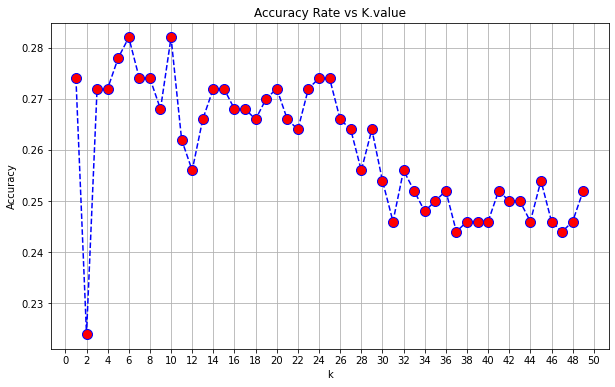

In [11]:
acc = []
plt.figure(figsize=(10,6))
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)# n_neighbors is the Number of neighbors to use
    knn.fit(X_train,y_train)
    y_pred_k = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test,y_pred_k))
plt.plot(range(1,50),acc,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.locator_params(axis="x", nbins=50)
plt.title('Accuracy Rate vs K.value')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy')

- As the accuracy_score is highest with value of 0.28 is at the value of K is 6 and 10 
- So the best K value i.e., n_neighbors is 6

# Logistic Regression

- Logistic regression predicts the output of a categorical dependent variable
- It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

### Logit equation
$log[\frac{y}{1-y}] = b_0+b_1x_1+b_2x_2+b_3x_3+.......+b_nx_n$

### Sigmoid Function

## $f(x) = \frac{1}{1+e^{-x}}$

![Alt()](https://cdn.hackaday.io/images/5998011530593785298.png)

Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

### Advantages

- Easier to implement, interpret and very efficient to train
- Makes no assumptions about distribution of classes in feature space
- Very fast at classifying unkown records

### Disadvantages

- If number of observations less thaan number of features it should not be used, otherwise it may lead to overfitting
- Non-linear problems can't be solved with logistic regression because it hasa a linear decision surface

In [8]:
from sklearn.linear_model import LogisticRegression

import time # Importing time to know the time taken for the data to be fit in the model
start_time_lr = time.time()

lr = LogisticRegression()
lr.fit(X_train,y_train) # Fitting X_train and y_train in the model to learn
y_pred_lr = lr.predict(X_test) # Predicting the values by the model for X_test data

end_time_lr = time.time()
duration_lr = end_time_lr - start_time_lr
print('Time for Logistic Regression :-',duration_lr)

print("\n")

from sklearn import metrics

print("Accuracy Score for Logistic Regression :-",metrics.accuracy_score(y_test, y_pred_lr))
print("\n")

from sklearn.metrics import classification_report, confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred_lr)
print("\nConfusion Matrix for Logistic Regression")
print("-------------------------------------------")
print(cm_lr,"\n")

cr_lr = classification_report(y_test,y_pred_lr)
print("Classification Report of Logistic Regression ")
print("----------------------------------------------")
print(cr_lr)

Time for Logistic Regression :- 6.388481855392456


Accuracy Score for Logistic Regression :- 0.324



Confusion Matrix for Logistic Regression
-------------------------------------------
[[19  2  5  1  2  4  2  7 11  4]
 [ 2 21  1  1  1  3  1  2  3  6]
 [ 6  2 11  4  7  5  6  4  5  1]
 [ 0  3  3 12  2  8 10  3  6  2]
 [ 3  2  5  3  8  4  6  7  1  1]
 [ 5  1  3  7 11  8  6  3  2  2]
 [ 0  1  8  7  7  7 21  1  2  0]
 [ 3  1  2  2  9  5  5 15  3  2]
 [10  2  4  1  2  4  0  3 24  7]
 [ 4 10  2  2  1  0  1  4  9 23]] 

Classification Report of Logistic Regression 
----------------------------------------------
              precision    recall  f1-score   support

           0       0.37      0.33      0.35        57
           1       0.47      0.51      0.49        41
           2       0.25      0.22      0.23        51
           3       0.30      0.24      0.27        49
           4       0.16      0.20      0.18        40
           5       0.17      0.17      0.17        48
       

# Random Forest Classifier

### Bagging 

- Dataset is divided into n number of models with d number of rows and m number of columns by random sampling and Feature sampling
- Every model is trained by subset data
- Every model gives an output 
- Major voting will be applied on the result of all the models

*Disadvantages of Decision Tree*
- By going in depth while applying Decision it leaves Overfitting 
- Low Bias and High varience


### By Random forest 


- High varience will be converted into low Varience
- It is one of the best algorithm for classification 
- By the hyper parameter the number of decision trees has to be used will be decided

*Hyper parameters*
- max_depth
- min_sample_split
- max_leaf_nodes
- min_samples_leaf
- n_estimators
- max_sample
- max_features

### Advantages
- It takes less training time as compared to other algorithms.
- It predicts output with high accuracy, even for the large dataset it runs efficiently.
- Prevents the overfitting issue

### Disadvantages
- It surely does a good job at classification but not as for regression problem as it does not gives precise continuous nature prediction.
- It doesn't have much interpretability

In [9]:
from sklearn.ensemble import RandomForestClassifier

import time # Importing time to know the time taken for the data to be fit in the model
start_time_rfc = time.time()

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train) # Fitting X_train and y_train in the model to learn
y_pred_rfc = rfc.predict(X_test) # Predicting the values by the model for X_test data

end_time_rfc = time.time()
duration_rfc = end_time_rfc - start_time_rfc
print('Time for Random Forest Classifier :-',duration_rfc)

print("\n")

from sklearn import metrics

print("Accuracy Score for Random Forest Classifier :-",metrics.accuracy_score(y_test, y_pred_rfc))
print("\n")

from sklearn.metrics import classification_report, confusion_matrix
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
print("\nConfusion Matrix for Random Forest Classifier")
print("-----------------------------------------------")
print(cm_rfc,"\n")

cr_rfc = classification_report(y_test,y_pred_rfc)
print("Classification Report of Random Forest Classifier ")
print("-------------------------------------------------")
print(cr_rfc)

Time for Random Forest Classifier :- 33.76439452171326


Accuracy Score for Random Forest Classifier :- 0.368



Confusion Matrix for Random Forest Classifier
-------------------------------------------
[[24  2  3  0  2  1  2  1 14  8]
 [ 1 20  3  0  1  3  0  2  5  6]
 [10  2 12  3  8  6  4  2  3  1]
 [ 2  4  9  5  5 11  7  2  1  3]
 [ 5  3  3  2 10  3  8  3  1  2]
 [ 3  0 10  7  4 16  3  4  1  0]
 [ 2  1  5  3 11  3 26  1  1  1]
 [ 3  5  3  4  6  5  5  7  3  6]
 [10  3  0  0  3  4  0  1 31  5]
 [ 4  5  0  2  0  0  0  2 10 33]] 

Classification Report of Random Forest Classifier 
----------------------------------------------
              precision    recall  f1-score   support

           0       0.38      0.42      0.40        57
           1       0.44      0.49      0.47        41
           2       0.25      0.24      0.24        51
           3       0.19      0.10      0.13        49
           4       0.20      0.25      0.22        40
           5       0.31      0.33      0.

# Navie Bayes 

Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions

### Working Steps

- Convert the given dataset into frequency tables.
- Generate Likelihood table by finding the probabilities of given features.
- Now, use Bayes theorem to calculate the probability.

## Bayes theorem formula

## $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

### Types of Naive Bayes
- Gaussian
- Multi Nomial
- Bernouli

Gaussian: The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.

Multinomial: The Multinomial Naïve Bayes classifier is used when the data is multinomial distributed. It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc.
The classifier uses the frequency of words for the predictors.

Bernoulli: The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.

### Advantages

- One of the fast and easy ML algorithms to predict a class of datasets.
- It can be used for Binary as well as Multi-class Classifications.
- It performs well in Multi-class predictions as compared to the other Algorithms.
- It is the most popular choice for text classification problems

### Disadvantage

- Assumes that all features are independent or unrelated
- It cannot learn the relationship between features.

In [11]:
from sklearn.naive_bayes import GaussianNB

import time # Importing time to know the time taken for the data to be fit in the model
start_time_nb = time.time()

nb = GaussianNB()
nb.fit(X_train,y_train) # Fitting X_train and y_train in the model to learn
y_pred_nb = nb.predict(X_test) # Predicting the values by the model for X_test data

end_time_nb = time.time()
duration_nb = end_time_nb - start_time_nb
print('Time for Naive Bayes :-',duration_nb)
  
print("\n")

from sklearn import metrics

print("Accuracy Score for Naive Bayes :-",metrics.accuracy_score(y_test, y_pred_nb))
print("\n")

from sklearn.metrics import classification_report, confusion_matrix
cm_nb = confusion_matrix(y_test,y_pred_nb)
print("\nConfusion Matrix for Naive Bayes")
print("--------------------------------")
print(cm_nb,"\n")

cr_nb = classification_report(y_test,y_pred_nb)
print("Classification Report of Naive Bayes ")
print("---------------------------------------")
print(cr_nb)

Time for Naive Bayes :- 0.9159133434295654


Accuracy Score for Naive Bayes :- 0.29



Confusion Matrix for Naive Bayes
--------------------------------
[[23  1  2  1  1  0  6  0 13 10]
 [ 2  8  0  0  4  4  9  1  7  6]
 [14  0  6  1 12  5  8  1  3  1]
 [ 7  2  2  1 10  8 12  2  1  4]
 [ 5  0  3  1 13  1 10  2  3  2]
 [10  0  3  2  9 12  5  1  4  2]
 [ 3  1  5  0 14  1 26  0  1  3]
 [ 7  4  3  4 10  3  3  3  4  6]
 [ 8  3  3  1  1  5  0  1 30  5]
 [ 3  3  1  2  1  1  5  2 15 23]] 

Classification Report of Naive Bayes 
---------------------------------------
              precision    recall  f1-score   support

           0       0.28      0.40      0.33        57
           1       0.36      0.20      0.25        41
           2       0.21      0.12      0.15        51
           3       0.08      0.02      0.03        49
           4       0.17      0.33      0.23        40
           5       0.30      0.25      0.27        48
           6       0.31      0.48      0.38        54
   

# Decision Tree

### Working of Decision Tree

- Begin the tree with the root node that contains the complete dataset.
- Find the best attribute in the dataset using Attribute Selection Measure (ASM).
- Divide the data into subsets that contains possible values for the best attributes.
- Generate the decision tree node, which contains the best attribute.
- Recursively make new decision trees using the subsets of the dataset that is being created
- Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

### Attribute Selection Measure (ASM)

- Information Gain
- Gini Index

#### Information gain
- Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
- It calculates how much information a feature provides us about a class.
- According to the value of information gain, we split the node and build the decision tree.
- A decision tree algorithm always tries to maximize the value of information gain
- Node/attribute having the highest information gain is split first

Information Gain = Entropy- [(Weighted Avg) *Entropy(each feature)]

#### Entropy
Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data.

#### Gini Index
- Measure of impurity or purity used while creating a decision tree in the CART algorithm.
- An attribute with the low Gini index should be preferred as compared to the high Gini index.
- It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.

#### Pruning
- Pruning is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree.

- A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning

### Advantages

- Simple to understand as it follows the same process which a human follow while making any decision in real-life.
- It can be very useful for solving decision-related problems.
- It helps to think about all the possible outcomes for a problem.
- There is less requirement of data cleaning compared to other algorithms

### Disadvantages

- Decision tree contains lots of layers, which makes it complex.
- It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
- For more class labels, the computational complexity of the decision tree may increase

In [12]:
from sklearn.tree import DecisionTreeClassifier  

import time # Importing time to know the time taken for the data to be fit in the model
start_time_dtree = time.time()

dtree = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=0,min_samples_leaf=15)  

dtree.fit(X_train,y_train) # Fitting X_train and y_train in the model to learn
y_pred_dtree = dtree.predict(X_test) # Predicting the values by the model for X_test data

end_time_dtree = time.time()
duration_dtree = end_time_dtree - start_time_dtree
print('Time for Decision Tree :-',duration_dtree)
  
print("\n")

from sklearn import metrics

print("Accuracy Score for Decision Tree :-",metrics.accuracy_score(y_test, y_pred_dtree))
print("\n")

from sklearn.metrics import classification_report, confusion_matrix
cm_dtree = confusion_matrix(y_test,y_pred_dtree)
print("\nConfusion Matrix for Decision Tree")
print("---------------------------------")
print(cm_dtree,"\n")

cr_dtree = classification_report(y_test,y_pred_dtree)
print("Classification Report of Decision Tree ")
print("--------------------------------------")
print(cr_dtree)

Time for Decision Tree :- 39.053203105926514


Accuracy Score for Decision Tree :- 0.232



Confusion Matrix for Decision Tree
---------------------------------
[[21  3 10  6  1  1  2  2  7  4]
 [ 4 15  0  2  0  2  4  3  4  7]
 [ 3  4 11  3  5  7 10  5  2  1]
 [ 2  6  4  5  3  8  9  5  3  4]
 [ 4  3  6  7  5  1  5  6  3  0]
 [ 2  4  4 10  3  8  4  4  6  3]
 [ 3  2  7 12  6  2 18  2  2  0]
 [ 1  5  7  5  3  4  6  6  5  5]
 [17  2  4  5  2  5  0  3 15  4]
 [ 4 14  4  4  1  1  5  3  8 12]] 

Classification Report of Decision Tree 
--------------------------------------
              precision    recall  f1-score   support

           0       0.34      0.37      0.36        57
           1       0.26      0.37      0.30        41
           2       0.19      0.22      0.20        51
           3       0.08      0.10      0.09        49
           4       0.17      0.12      0.14        40
           5       0.21      0.17      0.18        48
           6       0.29      0.33      0.31     

# SVM (Support Vector Machine)

It is maximum margin linear classifier. The data points which pushes aganist the margin are called support vectors and the width of the line that can be extended upto support vectors is called margin

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future

![Alt()](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

SVM can be of two types:

**Linear SVM** Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.


**Non-linear SVM** Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

**Hyperplane** There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out the best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.

**Support Vector** Data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector

It is maximum margin linear classifier. The data points which pushes aganist the margin are called support vectors and the width of the line that can be extended upto support vectors is called margin

### Advantages

- More effective in high dimensional spaces.
- Effective in cases where the number of dimensions is greater than the number of samples.
- Relatively memory efficient

### Disadvantages

- Not suitable for large data sets.
- Does not perform very well when the data set has more noise i.e. target classes are overlapping.
- In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import time # Importing time to know the time taken for the data to be fit in the model
start_time_svm = time.time()

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train,y_train) # Fitting X_train and y_train in the model to learn
#Pipeline(steps=[('standardscaler', StandardScaler()),
                #('svc', SVC(gamma='auto'))])
y_pred_svm = svm.predict(X_test) # Predicting the values by the model for X_test data

end_time_svm = time.time()
duration_svm = end_time_svm - start_time_svm
print('Time for Support Vector Machine :-',duration_svm)
  
print("\n")

from sklearn import metrics

print("Accuracy Score for Support Vector Machine :-",metrics.accuracy_score(y_test, y_pred_svm))
print("\n")

from sklearn.metrics import classification_report, confusion_matrix
cm_svm = confusion_matrix(y_test,y_pred_svm)
print("\nConfusion Matrix for Support Vector Machine")
print("--------------------------------------------")
print(cm_svm,"\n")

cr_svm = classification_report(y_test,y_pred_svm)
print("Classification Report of Support Vector Machine ")
print("-----------------------------------------------")
print(cr_svm)

Time for Support Vector Machine :- 249.66708493232727


Accuracy Score for Support Vector Machine :- 0.416



Confusion Matrix for Support Vector Machine
---------------------------------
[[25  1  3  1  1  2  2  2 15  5]
 [ 3 21  1  1  2  0  1  2  4  6]
 [ 6  2 20  4  4  7  6  1  1  0]
 [ 2  3  5 11  5 10  8  2  1  2]
 [ 4  2  9  0  8  3  8  3  1  2]
 [ 3  2  3 10  6 16  4  3  1  0]
 [ 2  2  7  2  9  1 27  2  1  1]
 [ 3  1  5  5  5  4  4 14  1  5]
 [ 7  2  1  1  1  3  0  1 35  6]
 [ 3  5  0  1  0  0  2  6  8 31]] 

Classification Report of Support Vector Machine 
--------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.44      0.43        57
           1       0.51      0.51      0.51        41
           2       0.37      0.39      0.38        51
           3       0.31      0.22      0.26        49
           4       0.20      0.20      0.20        40
           5       0.35      0.33      0.34        48
           6

# Ada Boost Classifier

Combining weak learners and making them into a strong learners

$W = \frac{1}{n}$

- Based on Entropy and Gini the features will be selected 
- If selected with help of Entropy the value has to be less as a base learner model

- For the incorrect classified the total error will be caluclated

## Perfomance of stump = $\frac{1}{2}log_e(\frac{1-TE}{TE})$

- The weight of the wrongly classified will be increased and the correctly classified will be decreased

- ## $NewSampleWeight = Weight * e^{-perfomance}$

### Advantages

- Adaboost is fast,simple and easy to program

### Disadvantages

- Weak classifiers being too weak can lead to low margins and overfitting.

In [10]:
from sklearn.ensemble import AdaBoostClassifier

import time # Importing time to know the time taken for the data to be fit in the model
start_time_ada = time.time()

ada = AdaBoostClassifier()
ada.fit(X_train,y_train) # Fitting X_train and y_train in the model to learn
y_pred_ada = ada.predict(X_test) # Predicting the values by the model for X_test data

end_time_ada = time.time()
duration_ada = end_time_ada - start_time_ada
print('Time for Ada Boost Classifier :-',duration_ada)

print("\n")

from sklearn import metrics

print("Accuracy Score for Ada Boost Classifier :-",metrics.accuracy_score(y_test, y_pred_ada))
print("\n")

from sklearn.metrics import classification_report, confusion_matrix
cm_ada = confusion_matrix(y_test,y_pred_ada)
print("\nConfusion Matrix for Ada Boost Classifier")
print("------------------------------------------")
print(cm_ada,"\n")

cr_ada = classification_report(y_test,y_pred_ada)
print("Classification Report of Ada Boost Classifier ")
print("---------------------------------------------")
print(cr_ada)

Time for Ada Boost Classifier :- 99.8421106338501


Accuracy Score for Ada Boost Classifier :- 0.294



Confusion Matrix for Ada Boost Classifier
--------------------------------------------
[[24  1  1  0  3  4  2  1 12  9]
 [ 2 14  1  0  1  3  4  1  5 10]
 [ 3  4  9  0  8  7 11  3  5  1]
 [ 1  6  2  2  3 13 13  4  3  2]
 [ 3  4  3  0  8  1 11  5  2  3]
 [ 7  3  5  2  5  9  7  5  3  2]
 [ 1  5  0  2  3  6 30  2  1  4]
 [ 7  3  4  0  6  2  7 10  3  5]
 [13  2  1  0  0  6  0  3 23  9]
 [ 7 12  1  0  1  2  2  4  9 18]] 

Classification Report of Ada Boost Classifier 
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.35      0.42      0.38        57
           1       0.26      0.34      0.29        41
           2       0.33      0.18      0.23        51
           3       0.33      0.04      0.07        49
           4       0.21      0.20      0.21        40
           5       0.17      0.19      0.18        48
  

# Gradient Boosting Classifier(XGBClassifier )

In [14]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
#X, y = make_hastie_10_2(random_state=0)

import time # Importing time to know the time taken for the data to be fit in the model
start_time_xgb = time.time()

xgb = GradientBoostingClassifier()
xgb.fit(X_train,y_train) # Fitting X_train and y_train in the model to learn
y_pred_xgb = xgb.predict(X_test) # Predicting the values by the model for X_test data

end_time_xgb = time.time()
duration_xgb = end_time_xgb - start_time_xgb
print('Time for GradientBoostingClassifier :-',duration_xgb)

print("\n")

from sklearn import metrics

print("Accuracy Score for GradientBoostingClassifier :-",metrics.accuracy_score(y_test, y_pred_xgb))
print("\n")

from sklearn.metrics import classification_report, confusion_matrix
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
print("\nConfusion Matrix for GradientBoostingClassifier")
print("-----------------------------------------------")
print(cm_xgb,"\n")

cr_xgb = classification_report(y_test,y_pred_xgb)
print("Classification Report of GradientBoostingClassifier ")
print("---------------------------------------------------")
print(cr_xgb)

Time for GradientBoostingClassifier :- 31047.20069384575


Accuracy Score for GradientBoostingClassifier :- 0.404



Confusion Matrix for GradientBoostingClassifier
-----------------------------------------------
[[26  1  3  1  2  1  3  2 10  8]
 [ 1 17  1  1  1  3  2  1  5  9]
 [ 6  3 16  3  6  4  6  3  3  1]
 [ 0  2  6 11  4 15  5  3  1  2]
 [ 3  1  4  5 12  3  4  5  1  2]
 [ 2  3  7 10  6  9  2  5  3  1]
 [ 0  0  5  3  7  2 33  2  0  2]
 [ 1  0  4  6  3  3  5 20  4  1]
 [12  3  1  0  1  4  0  2 32  2]
 [ 7  5  1  1  0  2  1  4  9 26]] 

Classification Report of GradientBoostingClassifier 
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.46      0.45        57
           1       0.49      0.41      0.45        41
           2       0.33      0.31      0.32        51
           3       0.27      0.22      0.24        49
           4       0.29      0.30      0.29        40
           5       0.20 

### Cross Validation

- LOOCV (Leave One Out Cross Validation)
- K Fold Cross Validation
- Tine Series
- Stratified Cross validation
- LPOCV (Leave P Out Cross Validation)
- Grid Search
- Random Search

### Grid Search

![Alt()](https://miro.medium.com/max/454/0*4O9P0rwkJGmFr8r6)

### Random Search

![Alt()](https://miro.medium.com/max/454/0*zOI72ajRHAq9W_uU)